# Pohyb planet a Keplerovy zákony
## Historie
1. popsal pohyb planet Tycho Brahe -> z jeho měření vyšel Johannes Kepler, popsal jak -> Newton popsal proč se pohybují.
## 1. Zákon
- Planety se pohybují kolem Slunce po elipsách
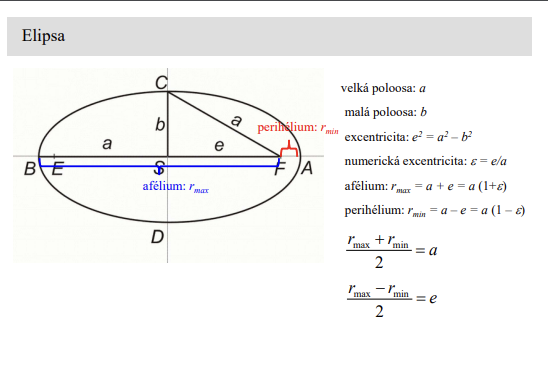
## 2. Plochy opsané průvodičem planety za stejný čas jsou stejné

$$
\frac{dS}{dt} =\frac{1}{2} (r \cross dr)   
$$
## 3. Zákon
Označíme-li $T_{1}$ a $T_{2}$ oběžné doby dvou planet a $a_{1}$ a $a_{2}$ délky jejich hlavních poloos, potom platí:
$$
\frac{T_{1}^{2}}{T_{2}^{2}} = \frac{a_{1}^{3}}{a_{2}^{3}}
$$
Poznámka: U planet hlavní poloosu nazýváme jako střední vzdálennost od Slunce, a spočítáme jí jako průměr afélia a perihélia

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from IPython.display import HTML
from scipy.integrate import solve_ivp

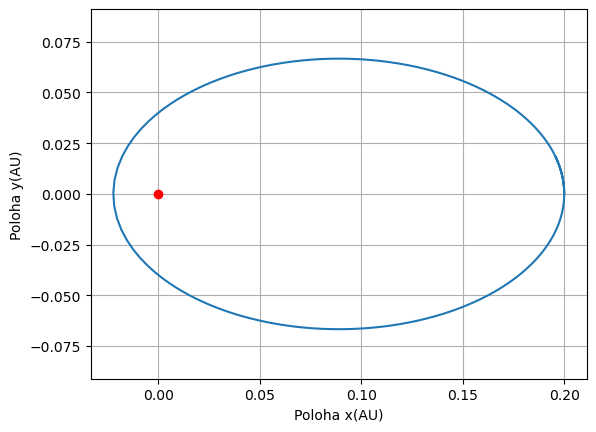

In [166]:
def pohybova_rovnice_planety(t, L):
  """Předpokládá L = [x,y,vx,vy]. Vrací časovou derovaci dle Newtona."""

  GM = 4 * np.pi**2     # Chytře zvolená G v jednotkách AU, rok, hmotnost_Slunce
  x, y, vx, vy  = L

  r2 = x*x+y*y
  r_3 = 1/(r2*np.sqrt(r2))
  ax = - GM * x*r_3
  ay = - GM * y*r_3

  return np.array([vx, vy, ax, ay])

dt   = 1/(365*24)        # jedna hodina 
tmax = 0.04            # dva roky


x0  = 0.2          # počáteční vzdálennost
y0  = 0
vx0 = 0             # jednotka délky je AU/rok
vy0 = 2*np.pi       # kruhová rychlost pro r=1AU
L0 = np.array([x0, y0, vx0, vy0])

sol = solve_ivp(pohybova_rovnice_planety, (0,tmax), L0, max_step=dt)

plt.plot(sol.y[0], sol.y[1])
plt.plot([0],[0],'or') #slunce
plt.axis('equal')
plt.ylabel("Poloha y(AU)")
plt.xlabel("Poloha x(AU)")
plt.grid()
plt.show()

Text(0, 0.5, 'v (AU/rok)')

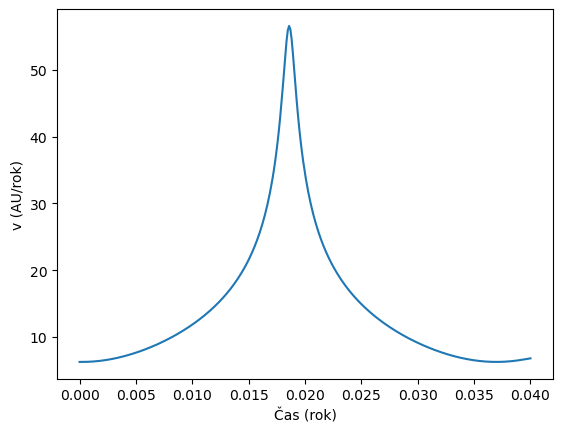

In [138]:
v = np.sqrt(sol.y[2]**2 + sol.y[3]**2)
t_array = np.linspace(0,tmax,len(v))
plt.plot(t_array,v)
plt.xlabel("Čas (rok)")
plt.ylabel("v (AU/rok)")

Text(0, 0.5, 'v (AU/rok)')

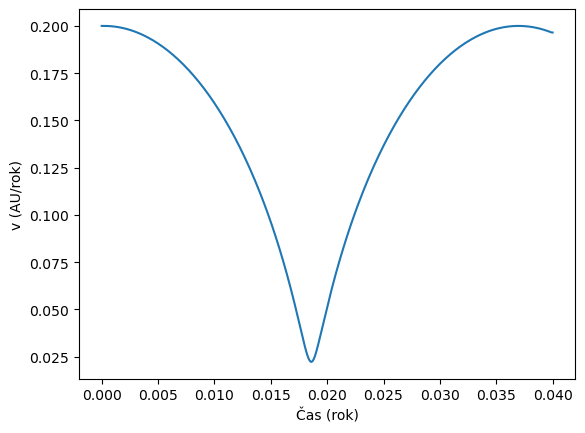

In [139]:
r = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
t_array = np.linspace(0,tmax,len(v))
plt.plot(t_array,r)
plt.xlabel("Čas (rok)")
plt.ylabel("Vzdálenost od Slunce (AU)")

# Důkaz druhého zákona

Ploch první plochy je 0.004231773241822501
Plocha druhé plochy je0.004225747418463939


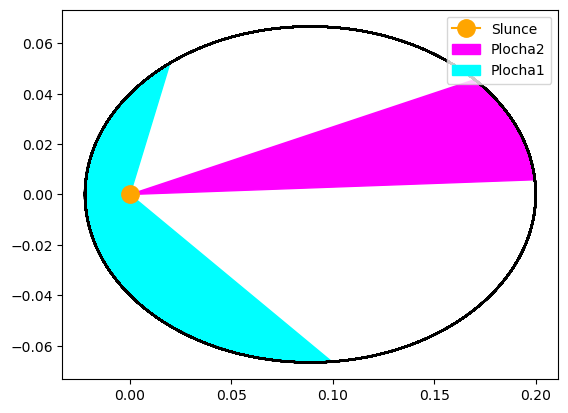

In [126]:
## Druhý keplerův zákon
from matplotlib.patches import Polygon
interval_length = 60
set_of_coordinates1 = np.zeros((interval_length+2,2))
interval_start1 = 10
interval_start2 = 150#pěkný interval500
set_of_coordinates1[1:interval_length+1,0] = sol.y[0][interval_start1:interval_length+interval_start1]
set_of_coordinates1[1:interval_length+1,1] = sol.y[1][interval_start1:interval_length+interval_start1]

set_of_coordinates2 = np.zeros((interval_length+1,2))

set_of_coordinates2[1:interval_length+1,0] = sol.y[0][interval_start2:interval_start2+ interval_length]
set_of_coordinates2[1:interval_length+1,1] = sol.y[1][interval_start2:interval_start2+interval_length]
# print(set_of_coordinates1[:,1])
fig,ax = plt.subplots()
p = Polygon(set_of_coordinates1,closed=True,color="magenta",label="Plocha2")
p2 = Polygon(set_of_coordinates2,closed=True,color="cyan",label="Plocha1")
ax.plot(sol.y[0], sol.y[1],c="black")
ax.plot(0,0,marker=".", markersize=25,c="orange",label="Slunce")
ax.add_patch(p)
ax.add_patch(p2)
ax.legend(loc="upper right")
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

print(f"Ploch první plochy je {PolyArea(set_of_coordinates1[:,0],set_of_coordinates1[:,1])}")
print(f"Plocha druhé plochy je{PolyArea(set_of_coordinates2[:,0],set_of_coordinates2[:,1])}")
# ax.plot(set_of_coordinates2[:,0],set_of_coordinates2[:,1],c="red")
# <!-- plt.polygon(sol.y[0],) -->

# Ukázka třetího zákona
Nenapadlo mě, jak jej implementovat v pythonu

In [140]:
# parametry animace
fps = 60           # snimku za sekundu
duration = 10        # trvání 5 sekund
frame_count = int(duration*fps)

# pořídíme řešení na delším časovém intervalu
tmax = 0.04
t_samples = np.linspace(0, tmax, frame_count)
sol = solve_ivp(pohybova_rovnice_planety, (0,tmax), L0, max_step=dt, t_eval=t_samples)


# příprava na vytvoření animace
frames = []         # vytvořím prázdný seznam snímků
fig = plt.figure()  # vytvořím prázdný obrázek
plt.grid()
plt.axis('equal')


# vytvoření animace snímek po snímku

for i in range(len(t_samples)):
    i0 = max(0,i-fps//2)
    i1 = i+1

    trace = sol.y[:, i0:i1]
    point = sol.y[:, i:i1]

    this_frame  = plt.plot(sol.y[0], sol.y[1], linewidth=0.4, color='gray')
    this_frame += plt.plot(trace[0], trace[1], point[0], point[1],'o',color='blue')
    # this_frame += plt.plot(trace[2], trace[3], point[2], point[3],'o',color='red')
    # this_frame += plt.plot(trace[4], trace[5], point[4], point[5],'o',color='green')

    frames.append(this_frame)

# snímky složíme do animace
ani = animation.ArtistAnimation(fig, frames, interval=1000//fps)
# ještě po sobě uklidíme, protože matplotlib nechal otevřený obrázek
plt.close()
writervideo = animation.FFMpegWriter(fps=60) 
ani.save("Oběh_planety.mp4",writer=writervideo)
# zobarzíme animaci v buňce Jupyteu
HTML(ani.to_html5_video())